In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [35]:
nx = 301
ny = 101
Lx = 6.e6
Ly = 4.e6
U0 = 30.
f0 = 1.e-4
beta = 1.67e-11
V  = 25.
c  = 25.
k  = 2.*np.pi/Lx
l  = 2.*np.pi/Ly
Z0 = 5.5e4

x = np.linspace(-3.e6, 3.e6, nx)
y = np.linspace(-1.e6, 1.e6, ny)
t = 0.
xx, yy = np.meshgrid(x,y)
dx = x[1] - x[0]
dy = y[1] - y[0]
Z = Z0 - U0*f0*yy + V*f0/k * np.sin(k*(xx-c*t))*np.cos(l*yy)

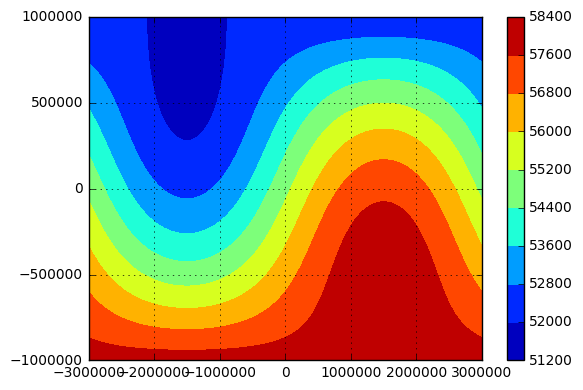

In [36]:
pl.contourf(x, y, Z, 10)
pl.colorbar()
pl.grid()
pl.tight_layout()

In [45]:
ug = -np.gradient(Z, dy, axis=0) / f0
vg =  np.gradient(Z, dx, axis=1) / f0

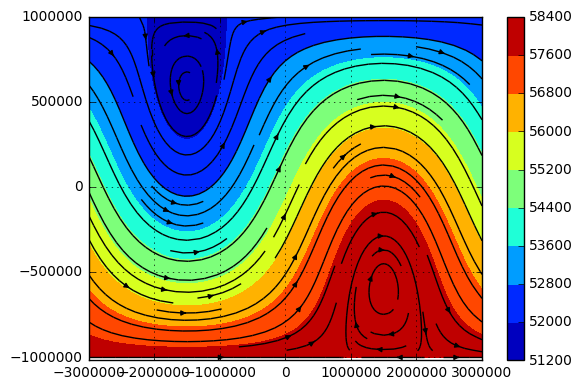

In [46]:
pl.contourf(x, y, Z, 10)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()

In [53]:
dudy = np.gradient(ug, dy, axis=0)
dvdx = np.gradient(vg, dx, axis=1)
vort = dvdx - dudy

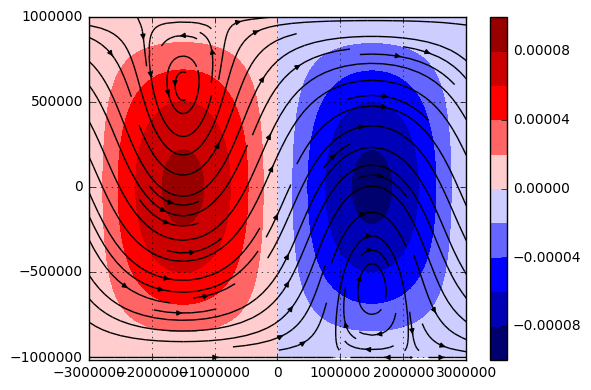

In [54]:
pl.contourf(x, y, vort, 10, cmap=pl.cm.seismic)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()

In [55]:
dvortdx = np.gradient(vort, dx, axis=1)
dvortdy = np.gradient(vort, dy, axis=0)
vort_adv = - ug*dvortdx - vg*dvortdy
f_adv = -vg*beta

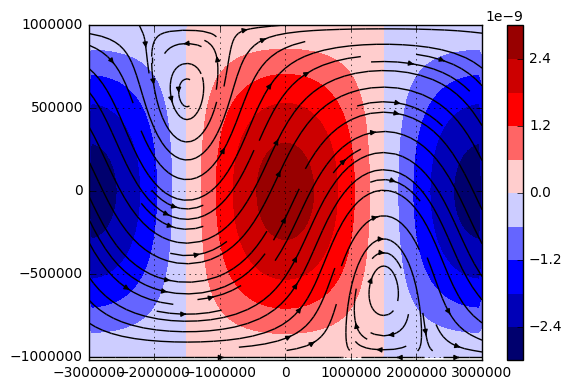

In [56]:
pl.contourf(x, y, vort_adv, 10, cmap=pl.cm.seismic)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()

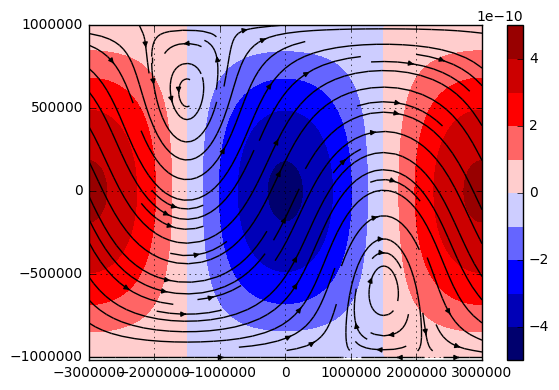

In [57]:
pl.contourf(x, y, f_adv, 10, cmap=pl.cm.seismic)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()

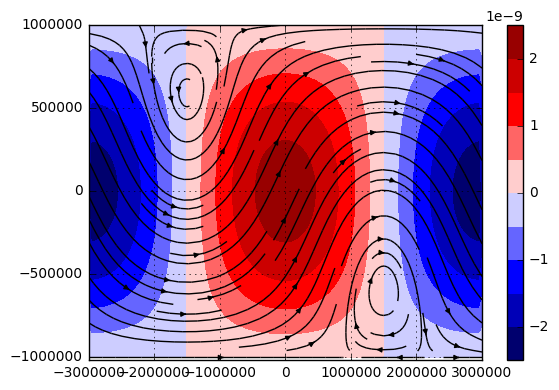

In [58]:
pl.contourf(x, y, vort_adv + f_adv, 10, cmap=pl.cm.seismic)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()

In [59]:
dudx = np.gradient(ug, dx, axis=1)
dvdy = np.gradient(vg, dy, axis=0)
div = dudx + dvdy

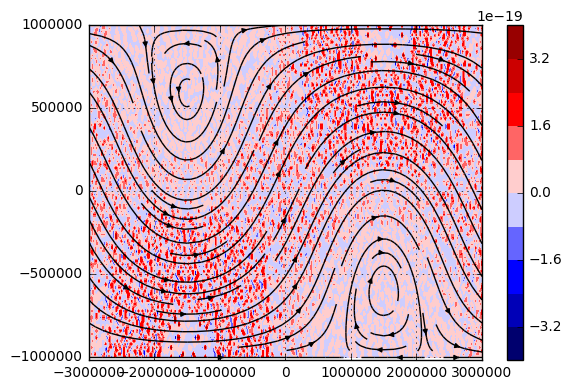

In [60]:
pl.contourf(x, y, div, 10, cmap=pl.cm.seismic)
pl.colorbar()
pl.streamplot(x, y, ug, vg, color='k')
pl.grid()
pl.tight_layout()